# Machine Learning Final Project 
SVM/SVR for Credircard Usage Prediction - 7 Features

### The Required Packages Import

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import make_moons
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

### Loading Data

In [2]:
dta = pd.read_csv(r"C:\Users\kenne\桌面\機器學習\Final Project\BankCreditcardDataSVM.csv")
# print(dta)
crdt = pd.DataFrame(dta)
# print(crdt)
X = crdt[['Customer_Age', 'Customer_Gender', 'Education_D1_Doctorate', 
          'Education_D2_PostGraduate', 'Education_D3_Graduate', 
          'Education_D4_College', 'Education_D5_HighSchool', 
          'Education_D6_Uneducated', 'Marital_D1_Single', 
          'Marital_D2_Married', 'Marital_D3_Divorced', 'Income_0_40', 
          'Income_40_60', 'Income_60_80', 'Income_80_120', 'Credit_Limit']]
y = crdt['AUR_Percentage']
X

,Customer_Age,Customer_Gender,Education_D1_Doctorate,Education_D2_PostGraduate,Education_D3_Graduate,Education_D4_College,Education_D5_HighSchool,Education_D6_Uneducated,Marital_D1_Single,Marital_D2_Married,Marital_D3_Divorced,Income_0_40,Income_40_60,Income_60_80,Income_80_120,Credit_Limit
0,45,1,0,0,0,0,1,0,0,1,0,0,0,1,0,12691.0
1,49,0,0,0,1,0,0,0,1,0,0,1,0,0,0,8256.0
2,51,1,0,0,1,0,0,0,0,1,0,0,0,0,1,3418.0
3,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3313.0
4,40,1,0,0,0,0,0,1,0,1,0,0,0,1,0,4716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,0,0,1,0,0,0,1,0,0,0,1,0,0,4003.0
10123,41,1,0,0,0,0,0,0,0,0,1,0,1,0,0,4277.0
10124,44,0,0,0,0,0,1,0,0,1,0,1,0,0,0,5409.0
10125,30,1,0,0,1,0,0,0,0,0,0,0,1,0,0,5281.0


In [3]:
crdt.describe()

,Customer_Age,Customer_Gender,Education_D1_Doctorate,Education_D2_PostGraduate,Education_D3_Graduate,Education_D4_College,Education_D5_HighSchool,Education_D6_Uneducated,Marital_D1_Single,Marital_D2_Married,Marital_D3_Divorced,Income_0_40,Income_40_60,Income_60_80,Income_80_120,Credit_Limit,AUR_Percentage
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,0.470919,0.044534,0.050953,0.308877,0.100030,0.198776,0.146835,0.389355,0.462822,0.073862,0.351634,0.176755,0.138442,0.151575,8631.953698,27.528093
std,8.016814,0.499178,0.206289,0.219912,0.462053,0.300054,0.399098,0.353959,0.487628,0.498641,0.261559,0.477504,0.381480,0.345380,0.358626,9088.776650,27.586794
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1438.300000,0.000000
25%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2555.000000,2.000000
50%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4549.000000,18.000000
75%,52.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,11067.500000,50.000000
max,73.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34516.000000,100.000000


### Ramdom Sampling

In [4]:
crdtr = crdt.sample(n=1000, replace=False, axis=0)
crdtr

,Customer_Age,Customer_Gender,Education_D1_Doctorate,Education_D2_PostGraduate,Education_D3_Graduate,Education_D4_College,Education_D5_HighSchool,Education_D6_Uneducated,Marital_D1_Single,Marital_D2_Married,Marital_D3_Divorced,Income_0_40,Income_40_60,Income_60_80,Income_80_120,Credit_Limit,AUR_Percentage
9706,53,0,0,0,0,0,1,0,0,1,0,0,0,0,0,7469.0,17
6106,54,1,0,1,0,0,0,0,1,0,0,0,0,0,1,34516.0,7
963,48,0,0,0,0,1,0,0,0,1,0,1,0,0,0,4570.0,53
6834,40,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1762.0,70
2772,37,1,0,0,1,0,0,0,1,0,0,0,0,0,0,34516.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,52,0,0,0,0,0,1,0,1,0,0,1,0,0,0,3029.0,75
9369,41,1,0,0,0,0,0,0,0,1,0,0,0,1,0,27945.0,0
6941,47,1,0,0,0,0,0,1,0,1,0,0,0,1,0,6519.0,23
4551,45,1,0,0,0,0,1,0,1,0,0,1,0,0,0,2766.0,72


In [5]:
X = crdtr[['Customer_Age', 'Customer_Gender', 'Education_D1_Doctorate', 
          'Education_D2_PostGraduate', 'Education_D3_Graduate', 
           'Education_D4_College', 'Education_D5_HighSchool', 
           'Education_D6_Uneducated', 'Marital_D1_Single', 
           'Marital_D2_Married', 'Marital_D3_Divorced', 'Income_0_40', 
           'Income_40_60', 'Income_60_80', 'Income_80_120', 'Credit_Limit']]
# X = crdtr[['Customer_Age', 'Credit_Limit']]
y = crdtr['AUR_Percentage']
X

,Customer_Age,Customer_Gender,Education_D1_Doctorate,Education_D2_PostGraduate,Education_D3_Graduate,Education_D4_College,Education_D5_HighSchool,Education_D6_Uneducated,Marital_D1_Single,Marital_D2_Married,Marital_D3_Divorced,Income_0_40,Income_40_60,Income_60_80,Income_80_120,Credit_Limit
9706,53,0,0,0,0,0,1,0,0,1,0,0,0,0,0,7469.0
6106,54,1,0,1,0,0,0,0,1,0,0,0,0,0,1,34516.0
963,48,0,0,0,0,1,0,0,0,1,0,1,0,0,0,4570.0
6834,40,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1762.0
2772,37,1,0,0,1,0,0,0,1,0,0,0,0,0,0,34516.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,52,0,0,0,0,0,1,0,1,0,0,1,0,0,0,3029.0
9369,41,1,0,0,0,0,0,0,0,1,0,0,0,1,0,27945.0
6941,47,1,0,0,0,0,0,1,0,1,0,0,0,1,0,6519.0
4551,45,1,0,0,0,0,1,0,1,0,0,1,0,0,0,2766.0


In [6]:
y

9706    17
6106     7
963     53
6834    70
2772     0
        ..
9355    75
9369     0
6941    23
4551    72
696      0
Name: AUR_Percentage, Length: 1000, dtype: int64

### Testing and Training Data

In [7]:
X = X.values
y = y.values
X_train, X_test, y_train, t_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=42)
# print(X, y)
print('Shape of Training Data:', X_train.shape)
print('Shape of Testing Data:', X_test.shape)

Shape of Training Data: (700, 16)
Shape of Testing Data: (300, 16)


### Plotting The Decision Margin

In [8]:
def meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    output = ax.contourf(xx, yy, Z, **params)
    return output

### Principle Component Analysis

In [9]:
## PCA for SVM
pcaSVM = PCA(n_components=2, iterated_power=1)
trainset_reduction = pcaSVM.fit_transform(X_train)
# PCA for SVR
pcaSVR = PCA(n_components=1, iterated_power=1)
X_reduction = pcaSVR.fit_transform(X)

In [10]:
print(trainset_reduction)

[[ 2.54209133e+04 -6.21222562e+00]
 [ 4.38791329e+03 -2.35267565e+00]
 [ 1.30619133e+04  3.70795725e+00]
 ...
 [-4.45308673e+03  6.59251136e+00]
 [ 7.60913262e+02  2.62648884e+00]
 [-2.26086724e+02  6.17167115e-01]]


In [11]:
print(X_reduction)

[[-1.28919101e+03]
 [ 2.57578090e+04]
 [-4.18819103e+03]
 [-6.99619102e+03]
 [ 2.57578090e+04]
 [-5.17519098e+03]
 [ 2.57578090e+04]
 [ 5.83780903e+03]
 [ 9.28090234e+01]
 [ 4.97808970e+02]
 [-4.43919100e+03]
 [-2.63019100e+03]
 [ 3.93980901e+03]
 [ 1.72998090e+04]
 [ 8.51880902e+03]
 [ 1.25458090e+04]
 [-2.48919098e+03]
 [-7.31989102e+03]
 [-3.82190967e+02]
 [-5.51219102e+03]
 [-6.15119099e+03]
 [ 6.43980901e+03]
 [-6.80719102e+03]
 [ 4.10180899e+03]
 [-5.66319099e+03]
 [-7.31989102e+03]
 [ 2.49528090e+04]
 [-6.94619101e+03]
 [ 5.56180903e+03]
 [-5.68619101e+03]
 [-2.33519098e+03]
 [-3.30619103e+03]
 [-1.12219101e+03]
 [-7.06319101e+03]
 [-6.41219100e+03]
 [-4.05019101e+03]
 [-6.23119098e+03]
 [-1.62319098e+03]
 [-5.09919098e+03]
 [-6.59019102e+03]
 [ 8.56980898e+03]
 [ 1.14728090e+04]
 [-6.54919103e+03]
 [-7.02419101e+03]
 [-2.15119098e+03]
 [-2.38819102e+03]
 [ 4.54780903e+03]
 [-6.75319102e+03]
 [-6.55419100e+03]
 [-6.74519100e+03]
 [-5.98519097e+03]
 [ 2.57578090e+04]
 [-6.9671910

### Support Vector Machine

###### Linear SVM

In [27]:
### Linear SVM
linearSvmModel = make_pipeline(StandardScaler(), 
                               SVC(gamma='auto', kernel="linear", 
                                   probability=True, random_state=42, 
                                   verbose=3))

linearSvmModel.fit(trainset_reduction, y_train)

[LibSVM]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(gamma='auto', kernel='linear', probability=True,
                     random_state=42, verbose=3))])

In [42]:
## Prediction & Accuracy
linearPredictionSVM = linearSvmModel.predict(trainset_reduction)
linearAccuracySVM = linearSvmModel.score(trainset_reduction, y_train)
print('The accurary is:', linearAccuracySVM)

The accurary is: 0.24571428571428572


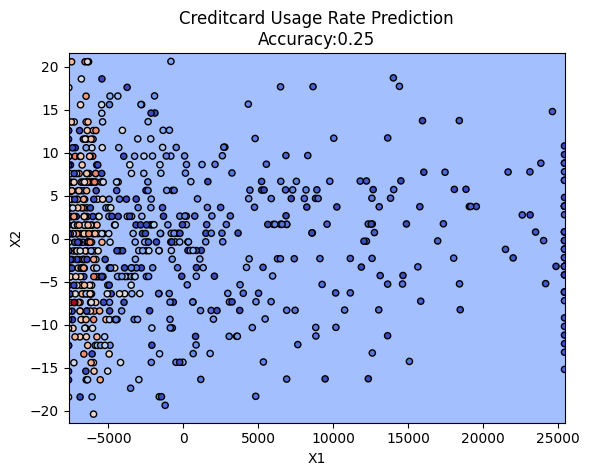

In [29]:
## Plotting
X0, X1 = trainset_reduction[:, 0], trainset_reduction[:, 1]
xx, yy = meshgrid(X0, X1)
contours(plt, linearSvmModel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Creditcard Usage Rate Prediction' + '\n' + 
          'Accuracy:%.2f'%linearAccuracySVM)
plt.show()

###### RBF SVM

In [30]:
### RBF SVM
rbfSvmModel = make_pipeline(StandardScaler(), 
                               SVC(gamma='auto', kernel="rbf", 
                                   probability=True, random_state=42, 
                                   verbose=3))

rbfSvmModel.fit(trainset_reduction, y_train)

[LibSVM]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(gamma='auto', probability=True, random_state=42,
                     verbose=3))])

In [31]:
## Prediction & Accuracy
rbfPredictionSVM = rbfSvmModel.predict(trainset_reduction)
rbfAccuracySVM = rbfSvmModel.score(trainset_reduction, y_train)
print('The accurary is:', rbfAccuracySVM)

The accurary is: 0.25


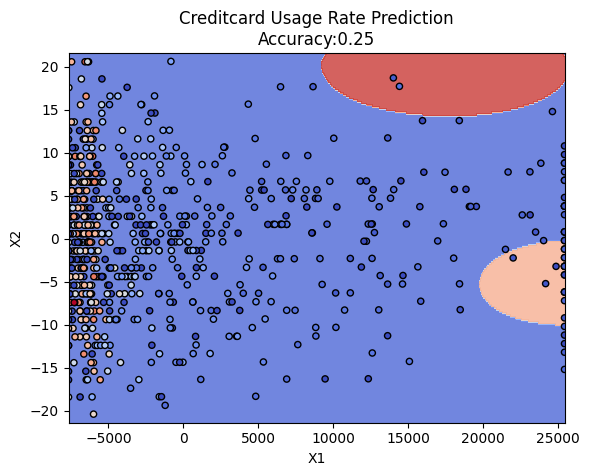

In [32]:
## Plotting
X0, X1 = trainset_reduction[:, 0], trainset_reduction[:, 1]
xx, yy = meshgrid(X0, X1)
contours(plt, rbfSvmModel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Creditcard Usage Rate Prediction' + '\n' + 'Accuracy:%.2f'%rbfAccuracySVM)
plt.show()

###### Polynomial SVM

In [33]:
### Polynomial SVM
polySvmModel = make_pipeline(StandardScaler(), 
                               SVC(gamma='auto', kernel="poly", 
                                   probability=True, random_state=42, 
                                   verbose=3))

polySvmModel.fit(trainset_reduction, y_train)

[LibSVM]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(gamma='auto', kernel='poly', probability=True,
                     random_state=42, verbose=3))])

In [34]:
## Prediction & Accuracy
polyPredictionSVM = polySvmModel.predict(trainset_reduction)
polyAccuracySVM = polySvmModel.score(trainset_reduction, y_train)
print('The accurary is:', polyAccuracySVM)

The accurary is: 0.25142857142857145


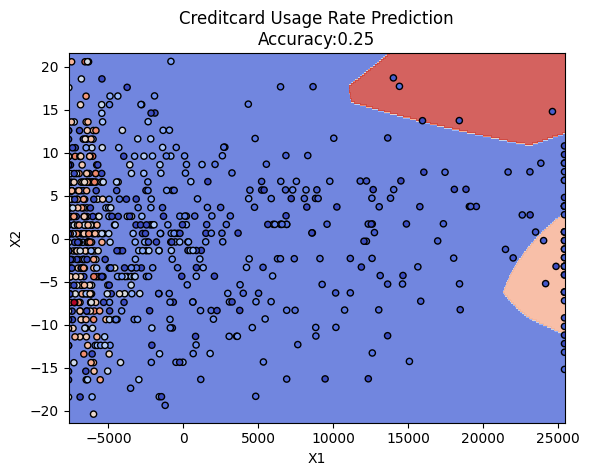

In [35]:
## Plotting
X0, X1 = trainset_reduction[:, 0], trainset_reduction[:, 1]
xx, yy = meshgrid(X0, X1)
contours(plt, polySvmModel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Creditcard Usage Rate Prediction' + '\n' + 
          'Accuracy:%.2f'%polyAccuracySVM)
plt.show()

### Support Vector Regression

###### Linear SVR

In [12]:
### Linear SVR
linearSvrModel = make_pipeline(StandardScaler(), 
                               SVR(kernel='linear', C=1.0, epsilon=0.2))
linearSvrModel.fit(X_reduction, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, kernel='linear'))])

In [40]:
## Model Assessment
predictionSVR = linearSvrModel.predict(X_reduction)
mse = metrics.mean_squared_error(y, predictionSVR)
print('R2 score:', linearSvrModel.score(X_reduction, y))
print('MSE score:', mse)

R2 score: 0.18963060986670333
MSE score: 578.8402095328454


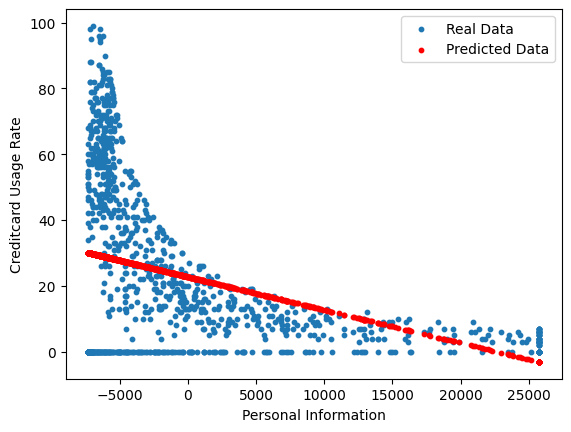

In [14]:
## Plotting
plt.scatter(X_reduction, y, s=10, label='Real Data')
plt.scatter(X_reduction, predictionSVR, color='r', s=10, label='Predicted Data')
plt.xlabel('Personal Information')
plt.ylabel('Creditcard Usage Rate')
plt.legend()

###### RBF SVR

In [15]:
### RBF SVR
rbfSvrModel = make_pipeline(StandardScaler(), 
                               SVR(kernel='rbf', C=1.0, epsilon=0.2))
rbfSvrModel.fit(X_reduction, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [16]:
## Model Assessment
rbfPredictionSVR = rbfSvrModel.predict(X_reduction)
mse = metrics.mean_squared_error(y, rbfPredictionSVR)
print('R2 score:', rbfSvrModel.score(X_reduction, y))
print('MSE score:', mse)

R2 score: 0.3051789044605916
MSE score: 496.305010315995


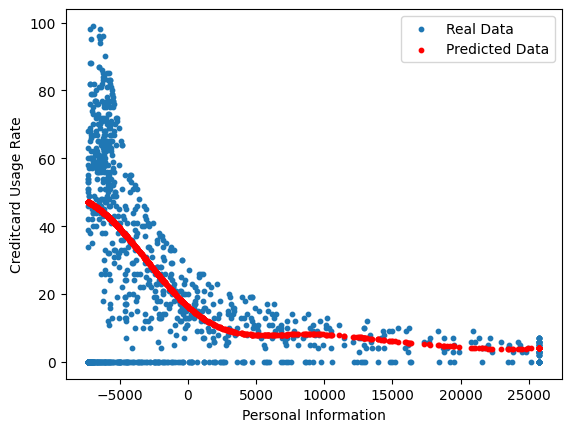

In [17]:
## Plotting
plt.scatter(X_reduction, y, s=10, label='Real Data')
plt.scatter(X_reduction, rbfPredictionSVR, color='r', s=10, label='Predicted Data')
plt.xlabel('Personal Information')
plt.ylabel('Creditcard Usage Rate')
plt.legend()

###### Polynomial SVR

In [18]:
### Polynomial SVR
polySvrModel = make_pipeline(StandardScaler(), 
                               SVR(kernel='poly', C=1.0, epsilon=0.2))
polySvrModel.fit(X_reduction, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, kernel='poly'))])

In [19]:
## Model Assessment
polyPredictionSVR = polySvrModel.predict(X_reduction)
mse = metrics.mean_squared_error(y, polyPredictionSVR)
print('R2 score:', polySvrModel.score(X_reduction, y))
print('MSE score:', mse)

R2 score: -0.031013452746844417
MSE score: 736.4444539557451


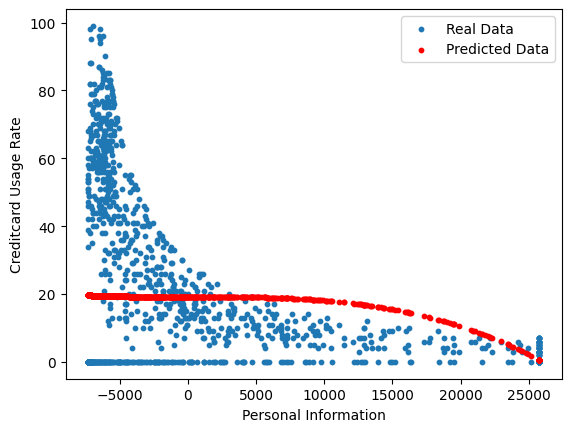

In [20]:
## Plotting
plt.scatter(X_reduction, y, s=10, label='Real Data')
plt.scatter(X_reduction, polyPredictionSVR, color='r', s=10, label='Predicted Data')
plt.xlabel('Personal Information')
plt.ylabel('Creditcard Usage Rate')
plt.legend()

### Linear Regression

In [21]:
## Model Assessment of Linear Regression
lineaR = LinearRegression().fit(X_reduction, y)

predictionLine = lineaR.predict(X_reduction)
mse = metrics.mean_squared_error(y, predictionLine)

print('R2 score:', lineaR.score(X_reduction, y))
print('MSE score:', mse)

R2 score: 0.2251531702933245
MSE score: 553.466735940628


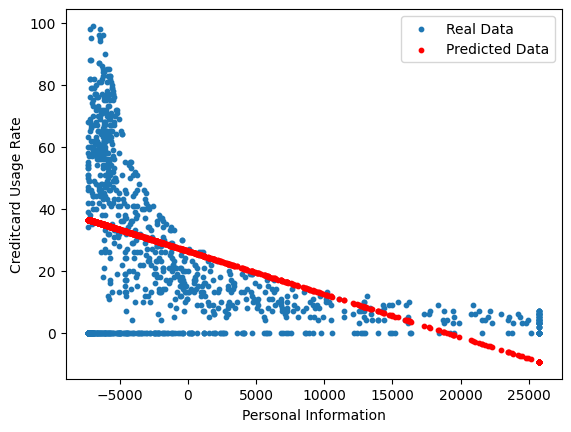

In [22]:
## Plotting
plt.scatter(X_reduction, y, s=10, label='Real Data')
plt.scatter(X_reduction, predictionLine, color='r', s=10, label='Predicted Data')
plt.xlabel('Personal Information')
plt.ylabel('Creditcard Usage Rate')
plt.legend()

### GridSearch CV

In [23]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'epsilon':[0.1, 0.01]}

svr = svm.SVR()
reg = GridSearchCV(svr, parameters, verbose=10)

reg.fit(X_reduction, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START epsilon=0.1, kernel=linear..................................
[CV 1/5; 1/6] END ..epsilon=0.1, kernel=linear;, score=-9.600 total time= 5.9min
[CV 2/5; 1/6] START epsilon=0.1, kernel=linear..................................
[CV 2/5; 1/6] END .epsilon=0.1, kernel=linear;, score=-23.779 total time= 4.1min
[CV 3/5; 1/6] START epsilon=0.1, kernel=linear..................................
[CV 3/5; 1/6] END .epsilon=0.1, kernel=linear;, score=-13.647 total time= 4.2min
[CV 4/5; 1/6] START epsilon=0.1, kernel=linear..................................
[CV 4/5; 1/6] END .epsilon=0.1, kernel=linear;, score=-35.013 total time= 5.0min
[CV 5/5; 1/6] START epsilon=0.1, kernel=linear..................................
[CV 5/5; 1/6] END .epsilon=0.1, kernel=linear;, score=-12.184 total time= 3.7min
[CV 1/5; 2/6] START epsilon=0.1, kernel=rbf.....................................
[CV 1/5; 2/6] END ......epsilon=0.1, kernel=rbf;,

GridSearchCV(estimator=SVR(),
             param_grid={'epsilon': [0.1, 0.01],
                         'kernel': ('linear', 'rbf', 'poly')},
             verbose=10)

In [24]:
reg.score(X_reduction, y)

0.30484732357063216

In [25]:
reg.predict(X_reduction)

array([21.5967181 ,  4.10025678, 35.63369765, 46.3488459 ,  4.10025678,
       40.10194021,  4.10025678,  7.89974105, 16.05729778, 14.70162412,
       36.81850025, 27.95506076,  8.41865392,  5.3261853 ,  8.06734103,
        7.14894971, 27.25988403, 47.0997673 , 17.81059375, 41.4844937 ,
       43.84500381,  7.92216088, 45.85538292,  8.31979911, 42.07477507,
       47.09976729,  3.90014715, 46.22218701,  7.9082615 , 42.16300331,
       26.50533634, 31.31558511, 20.86088689, 46.51413645, 44.69838179,
       34.97163041, 44.11381032, 23.11315107, 39.77857515, 45.24036254,
        8.06737233,  7.54839806, 45.1184754 , 46.41854192, 25.61185225,
       26.76439229,  8.11102736, 45.70711919, 45.13343499, 45.68488245,
       43.26747552,  4.10025678, 46.27572674, 43.8313988 , 46.71413751,
        4.10025678,  7.9918408 , 44.2785975 , 44.25239941,  4.10025678,
       41.75266068, 42.04783351, 27.65879765, 42.71233353, 47.09976722,
       43.89588343, 45.05535653, 30.15057858, 32.53106047, 44.89